# Physician Cost Efficiency Analysis Using BCBS Medicare Data

In [ ]:
# Import libraries
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [ ]:
# Upload dataset
from google.colab import files
uploaded = files.upload()

Saving I2_data.csv to I2_data.csv


In [ ]:
# Load dataset
dataset = pd.read_csv(io.StringIO(uploaded['I2_data.csv'].decode('utf-8')))
dataset.head()

,physician_id,physician_efficiency,metro_area,physician_working_specialty,physician_gender,physician_credential,physician_med_school,physician_graduation_year,bump_feature,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_engineered_1,medicare_engineered_2,medicare_engineered_3,medicare_enginerred_4,medicare_engineered_5,medicare_engineered_6,num_medicare_patients,medicare_patient_hcc_risk_score
0,866,0.10,Chicago,Nephrology,M,UNKNOWN,OTHER,2008.0,12,1.004,1.361,9.7,3.25,3,5,2,1,5,228,5.328
1,4766,0.12,Chicago,Hospital Based Physician,M,UNKNOWN,OTHER,1982.0,15,0.662,0.901,6.0,4.00,4,2,5,5,4,372,2.057
2,7088,0.12,Chicago,Nephrology,F,UNKNOWN,OTHER,2004.0,16,0.227,1.148,0.4,2.75,3,1,4,2,4,339,5.472
3,2808,0.12,Chicago,Nephrology,F,UNKNOWN,"LOYOLA UNIVERSITY OF CHICAGO, STRITCH SCHOOL O...",2013.0,14,0.135,1.060,1.4,4.00,4,3,4,4,5,358,6.300
4,4040,0.13,Dallas,Nephrology,F,UNKNOWN,OTHER,1979.0,17,1.096,1.100,3.3,3.00,3,1,5,4,2,219,3.445


### **Part 1: Descriptive Statistics**
Computing Mean, Median, and Quartiles

In [ ]:
# Compute the mean of your assigned variable
print(dataset['physician_efficiency'].mean())

1.0562275125118357


In [ ]:
# Compute the median of your assigned variable
print(dataset['physician_efficiency'].median())

1.01


In [ ]:
# Compute the first, second, and third quartile of your assigned variable
print(dataset['physician_efficiency'].quantile([0.25, 0.50, 0.75]))

0.25    0.86
0.50    1.01
0.75    1.20
Name: physician_efficiency, dtype: float64


In [ ]:
# Compute all descriptive statistics for physicians's data
dataset.describe()

,physician_id,physician_efficiency,physician_graduation_year,bump_feature,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_engineered_1,medicare_engineered_2,medicare_engineered_3,medicare_enginerred_4,medicare_engineered_5,medicare_engineered_6,num_medicare_patients,medicare_patient_hcc_risk_score
count,7393.000000,7393.000000,6674.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000
mean,4998.183417,1.056228,2002.603536,4948.712836,1.088763,1.067009,10.071081,2.802573,2.911944,2.647099,2.389287,2.421750,2.792371,495.109022,1.545016
std,2882.632252,0.355256,170.391845,2917.906257,0.409342,0.249731,4.844017,0.829564,0.884700,1.507928,1.679374,1.607064,1.385428,615.225229,0.794146
min,2.000000,0.100000,1961.000000,12.000000,0.047000,0.047000,0.300000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2495.000000,0.860000,1991.000000,2348.000000,0.920000,0.957000,6.100000,2.250000,2.000000,1.000000,1.000000,1.000000,2.000000,150.000000,1.037000
50%,5009.000000,1.010000,2000.000000,4943.000000,1.050000,1.054000,10.000000,2.750000,3.000000,3.000000,2.000000,2.000000,3.000000,317.000000,1.354000
75%,7475.000000,1.200000,2008.000000,7545.000000,1.181000,1.150000,14.100000,3.333000,3.000000,4.000000,4.000000,4.000000,4.000000,594.000000,1.830000
max,10002.000000,2.990000,9999.000000,9951.000000,19.907000,10.783000,29.100000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7090.000000,8.194000


**What is the mean, median, first, second, and third quartile of your assigned variable?**

*ANSWER*:
mean = 1.0562275125118357
median = 0.355256
quartile 1 = 0.860000
quartile 2 = 1.010000
quartile 3 = 1.200000

### **Part 2: Data Visualization**
Making Bar Charts and Boxplots

In [ ]:
# Sort dataset by your assigned variable
dataset = dataset.sort_values('physician_efficiency')
dataset.head()

,physician_id,physician_efficiency,metro_area,physician_working_specialty,physician_gender,physician_credential,physician_med_school,physician_graduation_year,bump_feature,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_engineered_1,medicare_engineered_2,medicare_engineered_3,medicare_enginerred_4,medicare_engineered_5,medicare_engineered_6,num_medicare_patients,medicare_patient_hcc_risk_score
0,866,0.10,Chicago,Nephrology,M,UNKNOWN,OTHER,2008.0,12,1.004,1.361,9.7,3.25,3,5,2,1,5,228,5.328
1,4766,0.12,Chicago,Hospital Based Physician,M,UNKNOWN,OTHER,1982.0,15,0.662,0.901,6.0,4.00,4,2,5,5,4,372,2.057
3,2808,0.12,Chicago,Nephrology,F,UNKNOWN,"LOYOLA UNIVERSITY OF CHICAGO, STRITCH SCHOOL O...",2013.0,14,0.135,1.060,1.4,4.00,4,3,4,4,5,358,6.300
2,7088,0.12,Chicago,Nephrology,F,UNKNOWN,OTHER,2004.0,16,0.227,1.148,0.4,2.75,3,1,4,2,4,339,5.472
4,4040,0.13,Dallas,Nephrology,F,UNKNOWN,OTHER,1979.0,17,1.096,1.100,3.3,3.00,3,1,5,4,2,219,3.445


/tmp/ipython-input-2119538784.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = 'physician_working_specialty', y = 'physician_efficiency', data = dataset, ci = None) # Make bar chart


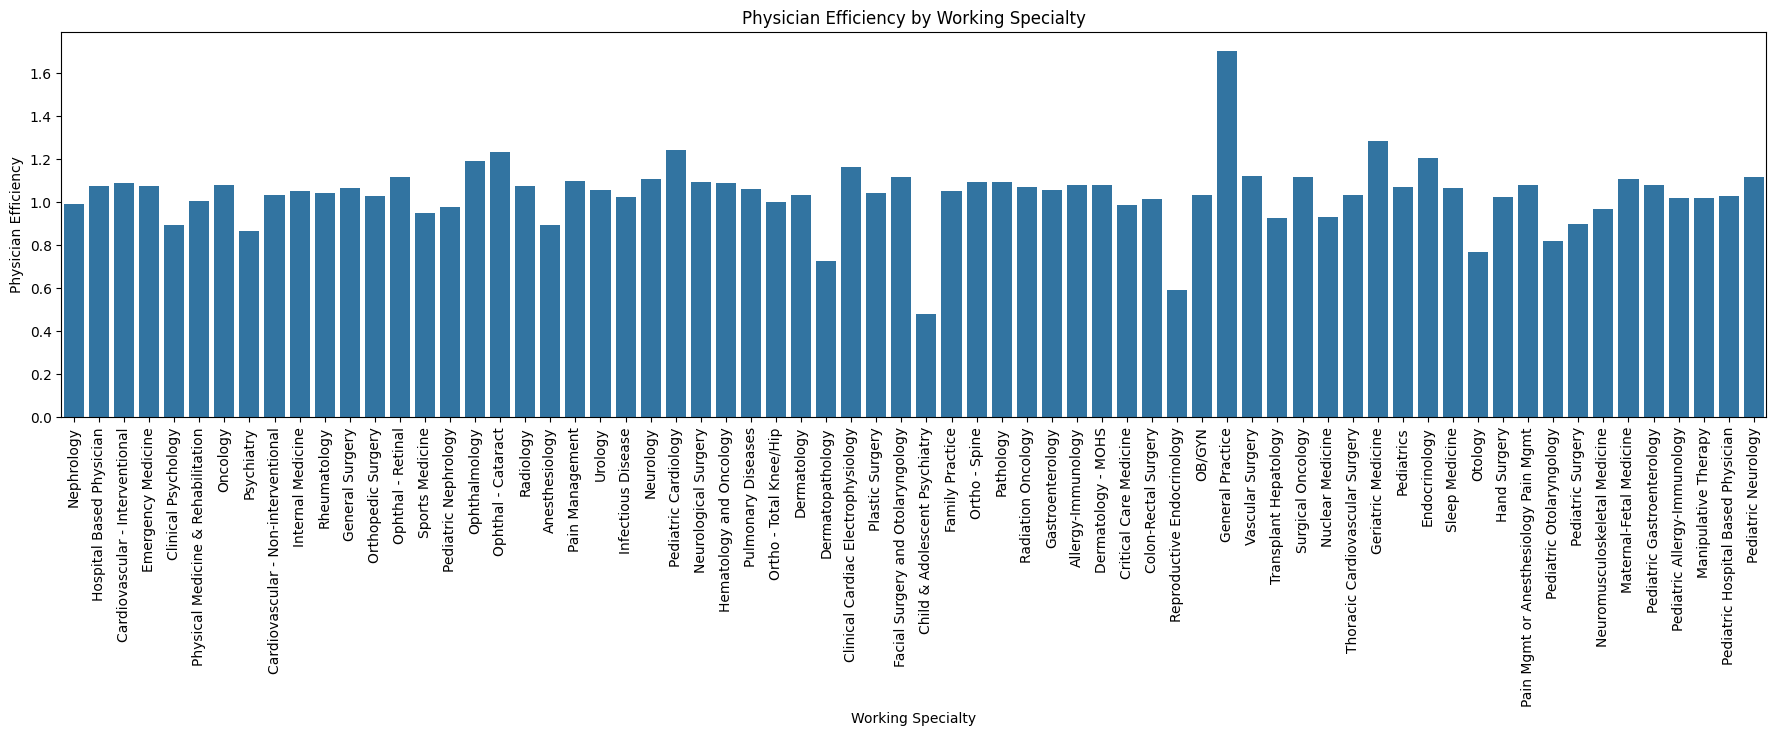

In [ ]:
# Make bar chart of your assigned variable
plt.figure(figsize=(22, 5)) # Set figure size (if needed)
ax = sns.barplot(x = 'physician_working_specialty', y = 'physician_efficiency', data = dataset, ci = None) # Make bar chart
ax.set(title = 'Physician Efficiency by Working Specialty', xlabel = 'Working Specialty', ylabel = 'Physician Efficiency') # Set chart title and axis labels
ax.tick_params(axis='x', rotation=90) # Rotate x-axis labels (if needed)

[Text(0.5, 1.0, 'Box Plot of Physician Efficiency'),
 Text(0, 0.5, 'Physician Efficiency')]

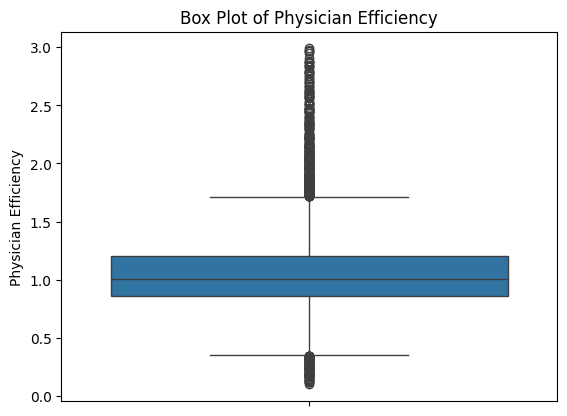

In [ ]:
# Make box plot of your assigned variable
ax = sns.boxplot(y = 'physician_efficiency', data = dataset) # Make box plot
ax.set(title = 'Box Plot of Physician Efficiency', ylabel = 'Physician Efficiency')

### **Part 3: Regression**


In [ ]:
# Predicting physician_efficiency

# Drop columns that should NOT be used for modeling
# - physician_id: random identifier
# - bump_feature: data leakage (derived from target)
drop_cols = ["physician_id", "bump_feature"]
X = dataset.drop(columns=[c for c in drop_cols if c in dataset.columns])

# Fix typo in the dataset
if "medicare_enginerred_4" in X.columns and "medicare_engineered_4" not in X.columns:
    X = X.rename(columns={"medicare_enginerred_4": "medicare_engineered_4"})

# Target variable (continuous)
y = dataset["physician_efficiency"]

In [ ]:
# Train / Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1
)

In [ ]:
# Preprocessing (handle missing values)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [ ]:
# Decision Tree REGRESSION model
from sklearn.tree import DecisionTreeRegressor

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("regressor", DecisionTreeRegressor(max_depth=6, random_state=1))
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['physician_efficiency', 'physician_graduation_year',
       'engineered_feature_1', 'engineered_feature_2', 'engineered_feature_3',
       'medicare_engineered_1', 'medicare_engineered_2',
       'medicare_engineered_3', 'medicare_engineere...
       'num_medicare_patients', 'medicare_patient_hcc_risk_score'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['metro_area', 'physician_working_specialty', 'physician_gender',
       'physician_credential', 'physician_med_school'],
      dtype='object'))])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=6, random_state=1))])

In [ ]:
# Evaluation (correct regression metrics)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2:  {r2:.4f}")

MAE:  0.0074
RMSE: 0.0092
R^2:  0.9993


### Conclusion:
The Decision Tree regression model performed strongly on the test set (MAE = 0.0074, RMSE = 0.0092, R² = 0.9993), indicating low prediction error and high explanatory power for physician efficiency. This makes the model useful for identifying key drivers of cost-efficiency variation and supporting data-driven decision-making in healthcare insurance.

### **Part 4: K-Fold Cross-Validation**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=1)

r2_scores = cross_val_score(
    model,
    X,
    y,
    cv=kf,
    scoring="r2"
)

print("Cross-validated R² scores:", r2_scores)
print("Mean R²:", r2_scores.mean())
print("Std Dev:", r2_scores.std())

Cross-validated R² scores: [0.99930312 0.99925844 0.9993021  0.99928673 0.99934305]
Mean R²: 0.9992986883335734
Std Dev: 2.7431007233001997e-05


### Cross-Validation Results:
Five-fold cross-validation produced consistently high R² values across all folds (mean R² = 0.9993, standard deviation = 0.00003), indicating stable model performance and strong generalization. The low variance across folds suggests that the model’s results are not driven by a particular data split and that remaining data leakage is unlikely.